--- Preparando datos ---
Datos escalados. Media cercana a 0, Std cercana a 1.
Pesos calculados -> Normal: 0.50, Jellyfish: 24204.43

--- Entrenando Red Neuronal ---


/home/2025/AST0421-1/mvalderrav/astro_env/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,441 (115.00 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7507 - auc: 0.8064 - loss: 0.7672 - val_accuracy: 0.9886 - val_auc: 0.8720 - val_loss: 0.2867 - learning_rate: 0.0010
Epoch 2/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8158 - auc: 0.8124 - loss: 0.6231 - val_accuracy: 0.7386 - val_auc: 0.8306 - val_loss: 0.5372 - learning_rate: 0.0010
Epoch 3/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7741 - auc: 0.8550 - loss: 0.4974 - val_accuracy: 0.8958 - val_auc: 0.8617 - val_loss: 0.3797 - learning_rate: 0.0010
Epoch 4/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7942 - auc: 0.8523 - loss: 0.5569 - val_accuracy: 0.9448 - val_auc: 0.7996 - val_loss: 0.3113 - learning_rate: 0.0010
Epoch 5/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7896 - auc: 0.8534 - loss: 0.7114 - val_accuracy: 0.8826 - val_auc: 0.8415 - val_loss: 0.3629 - learning_rate: 0.0010
⏱️ Tiempo NN: 99.93 segundos

--- Entrenando Random Forest (

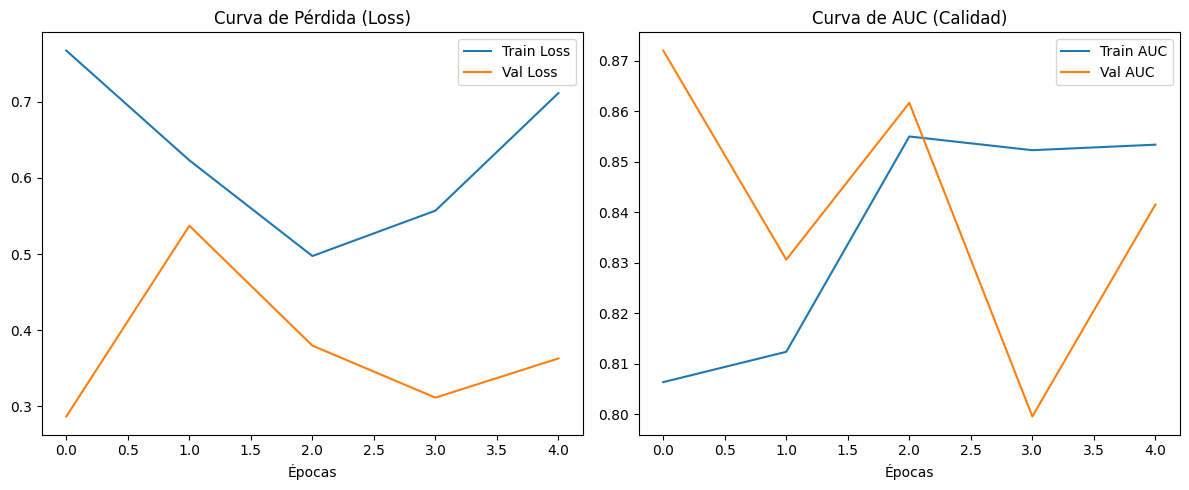

In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


print("--- Preparando datos ---")

df_clean = pd.read_pickle("tng099_clean.pkl")


X = df_clean.drop("JellyfishFlag", axis=1)
y = df_clean["JellyfishFlag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)  # ¡Solo transform, no fit!

print("Datos escalados. Media cercana a 0, Std cercana a 1.")

neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Pesos calculados -> Normal: {weight_for_0:.2f}, Jellyfish: {weight_for_1:.2f}")

# ============================================================
# 2. DEFINIR LA RED NEURONAL "COMPLEJA"
# ============================================================
def build_model(learning_rate=0.001, dropout_rate=0.3, n_units=64):
    """
    Crea una arquitectura robusta para datos tabulares.
    """
    model = Sequential()
    
    # Capa de Entrada
    model.add(Dense(n_units, input_shape=(X_train_sc.shape[1],), activation='relu'))
    model.add(BatchNormalization()) # Normaliza internamente para velocidad
    model.add(Dropout(dropout_rate)) # Apaga neuronas al azar para evitar memorización
    
    # Capa Oculta 1
    model.add(Dense(n_units, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Capa Oculta 2 (Más complejidad)
    model.add(Dense(n_units // 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Capa de Salida (Sigmoide para probabilidad 0 a 1)
    model.add(Dense(1, activation='sigmoid'))

    # Compilación
    optimizer = Adam(learning_rate=learning_rate)
    
    # Usamos AUC como métrica clave para desbalance
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

# ============================================================
# 3. ENTRENAMIENTO DE LA RED NEURONAL
# ============================================================
print("\n--- Entrenando Red Neuronal ---")

# Callbacks: Los "Jefes" que detienen el entrenamiento si no mejora
early_stop = EarlyStopping(
    monitor='val_auc',      # Vigilar el AUC en validación
    patience=4,            # Esperar 10 épocas antes de rendirse
    restore_best_weights=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_auc', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6,
    verbose=1
)

# Construir modelo
model = build_model(learning_rate=0.001, dropout_rate=0.3, n_units=128)
model.summary()

# MEDIR TIEMPO NN
start_time_nn = time.time()

history = model.fit(
    X_train_sc, y_train,
    epochs=30,               # Le damos muchas, el EarlyStopping lo cortará
    batch_size=2048,           # Lotes de galaxias
    validation_split=0.2,     # Validacion interna
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight, # ¡IMPORTANTE! Manejo de desbalance
    verbose=1
)

end_time_nn = time.time()
time_nn = end_time_nn - start_time_nn
print(f"⏱️ Tiempo NN: {time_nn:.2f} segundos")


print("\n--- Entrenando Random Forest (Baseline) ---")

rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=15, 
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)


start_time_rf = time.time()
#rf.fit(X_train, y_train) 
end_time_rf = time.time()

time_rf = end_time_rf - start_time_rf
print(f"⏱️ Tiempo RF: {time_rf:.2f} segundos")

# ============================================================
# 5. COMPARACIÓN FINAL: ¿QUIÉN ES MEJOR?
# ============================================================


y_pred_prob_nn = model.predict(X_test_sc)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)


y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]


f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("\n" + "="*40)
print("   RESULTADOS DE LA BATALLA   ")
print("="*40)
print(f"{'Modelo':<15} | {'Tiempo (s)':<10} | {'F1-Score':<10} | {'AUC-ROC':<10}")
print("-" * 55)
print(f"{'Neural Net':<15} | {time_nn:<10.2f} | {f1_nn:<10.4f} | {auc_nn:<10.4f}")
print(f"{'Random Forest':<15} | {time_rf:<10.2f} | {f1_rf:<10.4f} | {auc_rf:<10.4f}")
print("-" * 55)

# ============================================================
# 6. VISUALIZACIÓN DE CURVAS DE APRENDIZAJE (NN)
# ============================================================
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Curva de Pérdida (Loss)')
plt.xlabel('Épocas')
plt.legend()

# AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Curva de AUC (Calidad)')
plt.xlabel('Épocas')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# 1. Obtenemos las probabilidades crudas (NO las clases 0/1)
# Asegúrate de usar el conjunto de test escalado
y_probs = model.predict(X_test_sc) 

# 2. Calculamos la curva Precision-Recall para todos los umbrales posibles
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# 3. Calculamos el F1 para cada umbral posible
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# 4. Encontramos el índice del mejor F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\n--- AJUSTE DE UMBRAL ÓPTIMO ---")
print(f"El corte por defecto es 0.5, pero tu mejor corte es: {best_threshold:.4f}")
print(f"Usando ese corte, tu F1-Score subiría a: {best_f1:.4f}")

# 5. Aplicar el nuevo umbral para ver el reporte real
y_pred_optimo = (y_probs >= best_threshold).astype(int)

print("\n--- REPORTE CON UMBRAL CORREGIDO ---")
print(classification_report(y_test, y_pred_optimo))

In [4]:
import joblib

# 1. Guardar la Red Neuronal (Formato nativo de Keras)
# Se recomienda la extensión .keras en versiones nuevas de TensorFlow
nombre_modelo = "red_neuronal_jellyfish_v1.keras"
model.save(nombre_modelo)
print(f"✅ Cerebro guardado en: {nombre_modelo}")

# 2. Guardar el Escalador (OBLIGATORIO)
# Usamos joblib igual que con el Random Forest
nombre_scaler = "scaler_jellyfish_v1.pkl"
joblib.dump(scaler, nombre_scaler)
print(f"✅ Escalador guardado en: {nombre_scaler}")

print("\nYa puedes cerrar el notebook tranquilamente.")

✅ Cerebro guardado en: red_neuronal_jellyfish_v1.keras
✅ Escalador guardado en: scaler_jellyfish_v1.pkl

Ya puedes cerrar el notebook tranquilamente.


Ajustamos la muestra para que nos de datos relevantes

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


--- Aplicando Balanceo Agresivo ---
Total de Medusas disponibles: 118
Dataset reducido creado: 2478 galaxias.
   - Medusas: 118
   - Normales: 2360
Datos listos para la Red Neuronal.


--- Aplicando Balanceo Agresivo ---
Total de Medusas disponibles: 118
Dataset reducido creado: 1298 galaxias.
   - Medusas: 118
   - Normales: 1180
Datos listos para la Red Neuronal.
Datos escalados. Media cercana a 0, Std cercana a 1.
Pesos calculados -> Normal: 0.55, Jellyfish: 5.52

--- Entrenando Red Neuronal ---


/home/2025/AST0421-1/mvalderrav/astro_env/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5337 - auc: 0.6195 - loss: 0.8633 - val_accuracy: 0.9375 - val_auc: 0.8421 - val_loss: 0.6323 - learning_rate: 0.0010
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6181 - auc: 0.7930 - loss: 0.6133 - val_accuracy: 0.9375 - val_auc: 0.8817 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6795 - auc: 0.8490 - loss: 0.5382 - val_accuracy: 0.9375 - val_auc: 0.8945 - val_loss: 0.5197 - learning_rate: 0.0010
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6723 - auc: 0.8248 - loss: 0.5812 - val_accuracy: 0.9375 - val_auc: 0.8958 - val_loss: 0.4839 - learning_rate: 0.0010
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7253 - auc: 0.8307 - loss: 0.5586 - val_accuracy: 0.9375 - val_auc: 0.9025 - val_loss: 0.4521 - learning_rate: 0.0010
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7373 - auc: 0.8389 - loss

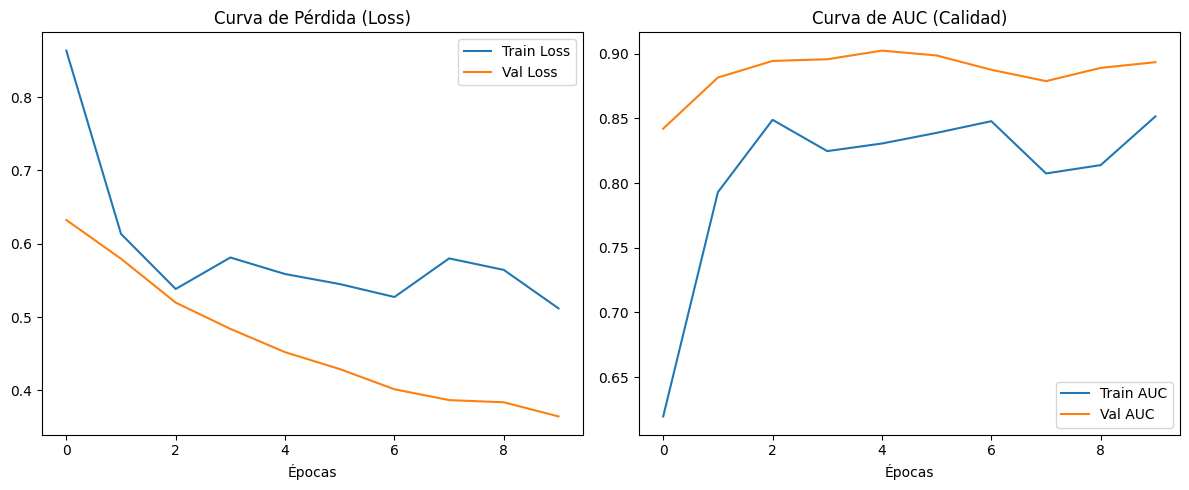

In [19]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


# ============================================================
# 1. UNDERSAMPLING MANUAL (La clave del éxito)
# ============================================================
print("--- Aplicando Balanceo Agresivo ---")
df_clean = pd.read_pickle("tng099_clean.pkl")

# Separamos las clases
df_jelly = df_clean[df_clean["JellyfishFlag"] == 1]
df_normal = df_clean[df_clean["JellyfishFlag"] == 0]

n_jelly = len(df_jelly)
print(f"Total de Medusas disponibles: {n_jelly}")

# Tomamos una muestra de normales (ej: 20 veces el número de medusas)
# Ratio 1:20 es mucho más manejable que 1:50000
n_normal_select = n_jelly * 10
df_normal_sample = df_normal.sample(n=n_normal_select, random_state=42)

# Unimos para crear el DATASET DE ENTRENAMIENTO EQUILIBRADO
df_balanced = pd.concat([df_jelly, df_normal_sample])
df_balanced = df_balanced.sample(frac=1, random_state=42) # Mezclar (Shuffle)

print(f"Dataset reducido creado: {len(df_balanced)} galaxias.")
print(f"   - Medusas: {len(df_jelly)}")
print(f"   - Normales: {len(df_normal_sample)}")

# ============================================================
# 2. PREPARACIÓN ESTÁNDAR
# ============================================================

X = df_balanced.drop("JellyfishFlag", axis=1)
y = df_balanced["JellyfishFlag"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Escalado (Fundamental para Redes Neuronales)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Recalcular pesos (ahora serán mucho más suaves, cercanos a 1 y 20)
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

print("Datos listos para la Red Neuronal.")
print("Datos escalados. Media cercana a 0, Std cercana a 1.")

# Calcular pesos de clase (porque hay pocas Jellyfish)
# Esto reemplaza el class_weight='balanced' de sklearn
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Pesos calculados -> Normal: {weight_for_0:.2f}, Jellyfish: {weight_for_1:.2f}")

# ============================================================
# 2. DEFINIR LA RED NEURONAL "COMPLEJA"
# ============================================================
def build_model(learning_rate=0.001, dropout_rate=0.3, n_units=64):
    """
    Crea una arquitectura robusta para datos tabulares.
    """
    model = Sequential()
    
    # Capa de Entrada
    model.add(Dense(n_units, input_shape=(X_train_sc.shape[1],), activation='relu'))
    model.add(BatchNormalization()) # Normaliza internamente para velocidad
    model.add(Dropout(dropout_rate)) # Apaga neuronas al azar para evitar memorización
    
    # Capa Oculta 1
    model.add(Dense(n_units, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Capa Oculta 2 (Más complejidad)
    model.add(Dense(n_units // 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Capa de Salida (Sigmoide para probabilidad 0 a 1)
    model.add(Dense(1, activation='sigmoid'))

    # Compilación
    optimizer = Adam(learning_rate=learning_rate)
    
    # Usamos AUC como métrica clave para desbalance
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

# ============================================================
# 3. ENTRENAMIENTO DE LA RED NEURONAL
# ============================================================
print("\n--- Entrenando Red Neuronal ---")

# Callbacks: Los "Jefes" que detienen el entrenamiento si no mejora
early_stop = EarlyStopping(
    monitor='val_auc',      # Vigilar el AUC en validación
    patience=5,            # Esperar 10 épocas antes de rendirse
    restore_best_weights=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_auc', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6,
    verbose=1
)

# Construir modelo
model = build_model(learning_rate=0.001, dropout_rate=0.3, n_units=64)
model.summary()

# MEDIR TIEMPO NN
start_time_nn = time.time()

history = model.fit(
    X_train_sc, y_train,
    epochs=50,               # Le damos muchas, el EarlyStopping lo cortará
    batch_size=32,           # Lotes de galaxias
    validation_split=0.2,     # Validacion interna
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight, # ¡IMPORTANTE! Manejo de desbalance
    verbose=1
)

end_time_nn = time.time()
time_nn = end_time_nn - start_time_nn
print(f"⏱️ Tiempo NN: {time_nn:.2f} segundos")

# ============================================================
# 4. ENTRENAMIENTO DEL RANDOM FOREST (Para comparar)
# ============================================================
print("\n--- Entrenando Random Forest (Baseline) ---")

rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=15, 
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# MEDIR TIEMPO RF
start_time_rf = time.time()
rf.fit(X_train, y_train) # RF usa datos NO escalados (X_train original)
end_time_rf = time.time()

time_rf = end_time_rf - start_time_rf
print(f"⏱️ Tiempo RF: {time_rf:.2f} segundos")

# ============================================================
# 5. COMPARACIÓN FINAL: ¿QUIÉN ES MEJOR?
# ============================================================

# Predicciones
# NN da probabilidades continuas, cortamos en 0.5
y_pred_prob_nn = model.predict(X_test_sc)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# RF
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Métricas
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("\n" + "="*40)
print("   RESULTADOS DE LA BATALLA   ")
print("="*40)
print(f"{'Modelo':<15} | {'Tiempo (s)':<10} | {'F1-Score':<10} | {'AUC-ROC':<10}")
print("-" * 55)
print(f"{'Neural Net':<15} | {time_nn:<10.2f} | {f1_nn:<10.4f} | {auc_nn:<10.4f}")
print(f"{'Random Forest':<15} | {time_rf:<10.2f} | {f1_rf:<10.4f} | {auc_rf:<10.4f}")
print("-" * 55)

# ============================================================
# 6. VISUALIZACIÓN DE CURVAS DE APRENDIZAJE (NN)
# ============================================================
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Curva de Pérdida (Loss)')
plt.xlabel('Épocas')
plt.legend()

# AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Curva de AUC (Calidad)')
plt.xlabel('Épocas')
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_1673108/1174061101.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_imp.head(10), palette="viridis")


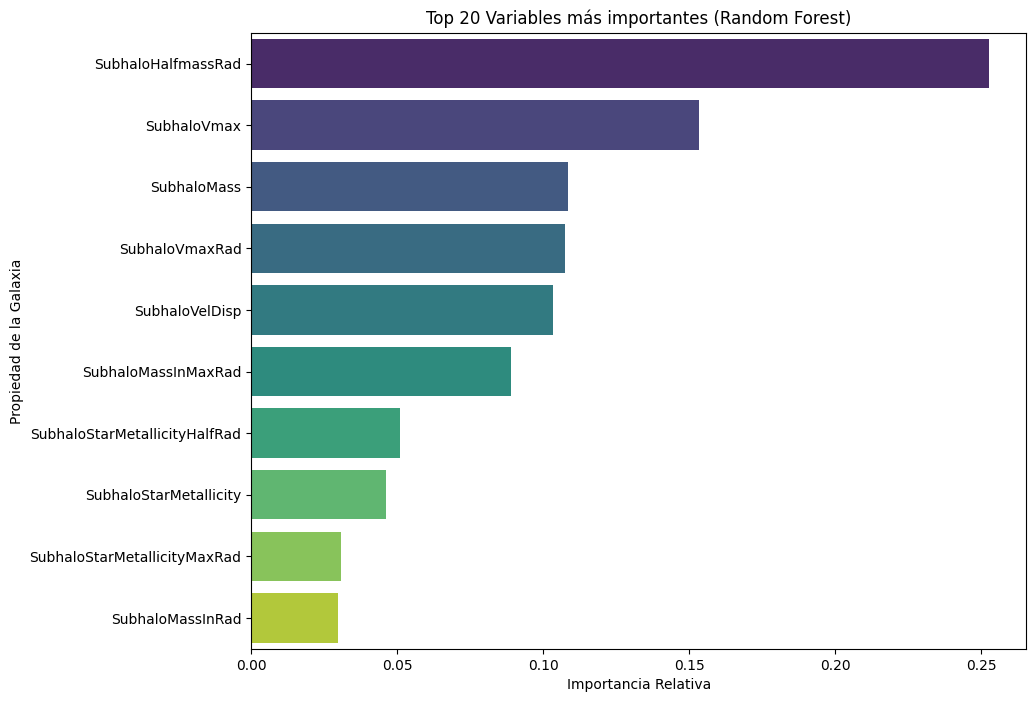

Las 5 variables más decisivas son:
               Feature  Importance
4   SubhaloHalfmassRad    0.252781
18         SubhaloVmax    0.153418
0          SubhaloMass    0.108504
19      SubhaloVmaxRad    0.107413
17      SubhaloVelDisp    0.103469


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraemos la importancia del modelo ya entrenado (rf)
importances = rf.feature_importances_
feature_names = X.columns

# Creamos un DataFrame para ordenarlo
df_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
df_imp = df_imp.sort_values("Importance", ascending=False)

# Graficamos el Top 20
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=df_imp.head(10), palette="viridis")
plt.title("Top 20 Variables más importantes (Random Forest)")
plt.xlabel("Importancia Relativa")
plt.ylabel("Propiedad de la Galaxia")
plt.show()

print("Las 5 variables más decisivas son:")
print(df_imp.head(5))

Calculando correlaciones entre variables...


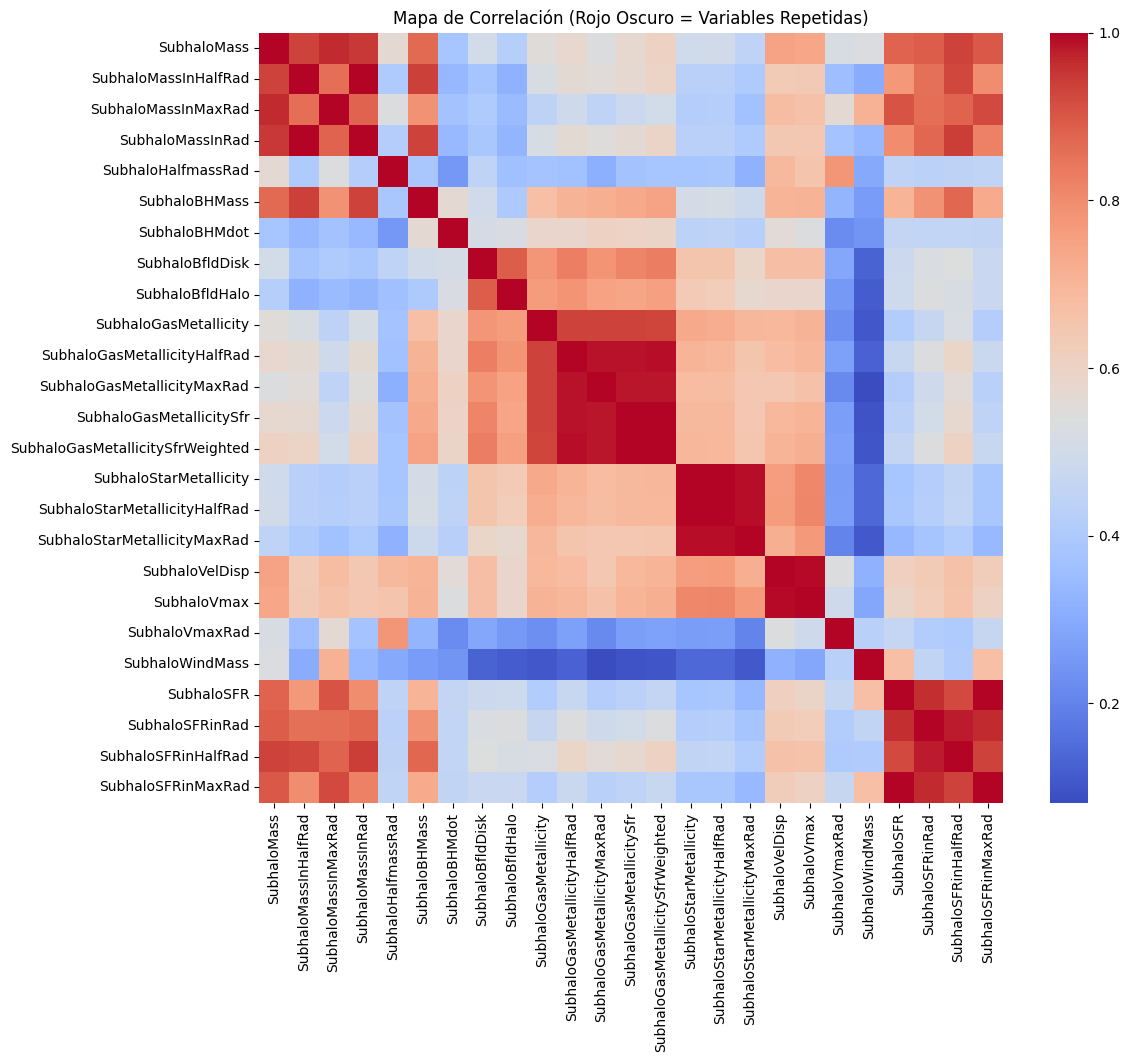


⚠️ Se detectaron 11 variables redundantes (Corr > 0.95):
['SubhaloMassInMaxRad', 'SubhaloMassInRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallicityMaxRad', 'SubhaloVmax', 'SubhaloSFRinRad', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad']

Variables originales: 25
Variables finales:    14
✅ ¡Datasets listos sin redundancia!


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CALCULAR LA MATRIZ DE CORRELACIÓN
# Usamos X_train (sin escalar, aunque da igual para correlación de Pearson)
print("Calculando correlaciones entre variables...")
corr_matrix = X_train.corr().abs()

# 2. VISUALIZAR EL PROBLEMA (El Mapa de Calor)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Mapa de Correlación (Rojo Oscuro = Variables Repetidas)")
plt.show()

# 3. ALGORITMO PARA BORRAR LAS REPETIDAS
# Seleccionamos el triángulo superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Buscamos columnas con correlación > 0.95 (Muy redundantes)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"\n⚠️ Se detectaron {len(to_drop)} variables redundantes (Corr > 0.95):")
print(to_drop)

# 4. CREAR NUEVOS DATASETS LIMPIOS
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)

print(f"\nVariables originales: {X_train.shape[1]}")
print(f"Variables finales:    {X_train_reduced.shape[1]}")
print("✅ ¡Datasets listos sin redundancia!")

--- 1. Aplicando Balanceo Agresivo ---
Dataset reducido creado: 1298 galaxias.

--- 2. Eliminando variables 'Rad' (Radios y Perfiles) ---
⚠️ Eliminando 12 columnas relacionadas con radios:
['SubhaloMassInHalfRad', 'SubhaloMassInMaxRad', 'SubhaloMassInRad', 'SubhaloHalfmassRad', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallicityMaxRad', 'SubhaloVmaxRad', 'SubhaloSFRinRad', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad']

Variables finales para entrenar: 13
Variables restantes: ['SubhaloMass', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloGasMetallicity', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloStarMetallicity', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloWindMass', 'SubhaloSFR']

--- Entrenando Red Neuronal ---


/home/2025/AST0421-1/mvalderrav/astro_env/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Entrenando Random Forest ---

Modelo          | F1-Score   | AUC-ROC   
---------------------------------------------
Neural Net      | 0.2857     | 0.7052    
Random Forest   | 0.5789     | 0.7228    
---------------------------------------------


/tmp/ipykernel_1673108/1447173847.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_imp.head(10), palette="viridis")


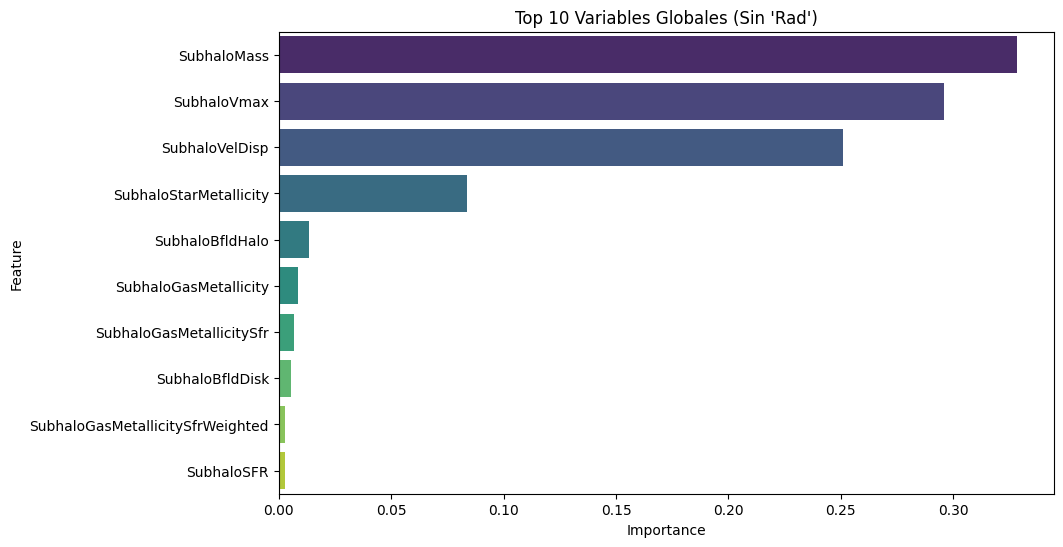

In [28]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# ============================================================
# 1. CARGA Y UNDERSAMPLING
# ============================================================
print("--- 1. Aplicando Balanceo Agresivo ---")
df_clean = pd.read_pickle("tng099_clean.pkl")

# Separamos las clases
df_jelly = df_clean[df_clean["JellyfishFlag"] == 1]
df_normal = df_clean[df_clean["JellyfishFlag"] == 0]

# Sampleo 1:10
n_jelly = len(df_jelly)
df_normal_sample = df_normal.sample(n=n_jelly * 10, random_state=42)

# Dataset Balanceado
df_balanced = pd.concat([df_jelly, df_normal_sample])
df_balanced = df_balanced.sample(frac=1, random_state=42)

print(f"Dataset reducido creado: {len(df_balanced)} galaxias.")

# ============================================================
# 2. FILTRO MANUAL: ELIMINAR COLUMNAS CON "RAD"
# ============================================================
print("\n--- 2. Eliminando variables 'Rad' (Radios y Perfiles) ---")

# Identificamos todas las columnas
all_columns = df_balanced.columns

# Buscamos las que tienen "rad" (en minúscula para atrapar 'Rad', 'rad', 'RAD')
# PERO protegemos 'JellyfishFlag' para no borrar el target
cols_to_drop = [col for col in all_columns if "rad" in col.lower() and col != "JellyfishFlag"]

print(f"⚠️ Eliminando {len(cols_to_drop)} columnas relacionadas con radios:")
print(cols_to_drop)

# Aplicamos el borrado
df_final = df_balanced.drop(columns=cols_to_drop)

# Definimos X e y con el dataset limpio
X = df_final.drop("JellyfishFlag", axis=1)
y = df_final["JellyfishFlag"]

print(f"\nVariables finales para entrenar: {X.shape[1]}")
print("Variables restantes:", list(X.columns))

# ============================================================
# 3. PREPARACIÓN (Split y Escalado)
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Pesos de clase
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

# ============================================================
# 4. RED NEURONAL (Entrenamiento Rápido)
# ============================================================
def build_model(learning_rate=0.001):
    model = Sequential()
    # Ajustamos input_shape a las nuevas dimensiones
    model.add(Dense(64, input_shape=(X_train_sc.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

print("\n--- Entrenando Red Neuronal ---")
model = build_model()
early_stop = EarlyStopping(monitor='val_auc', patience=8, restore_best_weights=True, mode='max')

hist = model.fit(
    X_train_sc, y_train, epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stop], class_weight=class_weight, verbose=0
)

# ============================================================
# 5. RANDOM FOREST
# ============================================================
print("\n--- Entrenando Random Forest ---")
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# ============================================================
# 6. RESULTADOS Y FEATURE IMPORTANCE
# ============================================================
y_pred_nn = (model.predict(X_test_sc, verbose=0) > 0.5).astype(int)
y_pred_rf = rf.predict(X_test)

print("\n" + "="*40)
print(f"{'Modelo':<15} | {'F1-Score':<10} | {'AUC-ROC':<10}")
print("-" * 45)
print(f"{'Neural Net':<15} | {f1_score(y_test, y_pred_nn):<10.4f} | {roc_auc_score(y_test, y_pred_nn):<10.4f}")
print(f"{'Random Forest':<15} | {f1_score(y_test, y_pred_rf):<10.4f} | {roc_auc_score(y_test, y_pred_rf):<10.4f}")
print("-" * 45)

# Gráfico de Importancia (Solo las variables globales)
importances = rf.feature_importances_
df_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=df_imp.head(10), palette="viridis")
plt.title("Top 10 Variables Globales (Sin 'Rad')")
plt.show()

In [2]:
import joblib

# 1. Guardar la Red Neuronal (Formato nativo de Keras)
# Se recomienda la extensión .keras en versiones nuevas de TensorFlow
nombre_modelo = "red_neuronal_jellyfish_v2.keras"
model.save(nombre_modelo)
print(f"✅ Cerebro guardado en: {nombre_modelo}")

# 2. Guardar el Escalador (OBLIGATORIO)
# Usamos joblib igual que con el Random Forest
nombre_scaler = "scaler_jellyfish_v2.pkl"
joblib.dump(scaler, nombre_scaler)
print(f"✅ Escalador guardado en: {nombre_scaler}")

print("\nYa puedes cerrar el notebook tranquilamente.")

✅ Cerebro guardado en: red_neuronal_jellyfish_v2.keras
✅ Escalador guardado en: scaler_jellyfish_v2.pkl

Ya puedes cerrar el notebook tranquilamente.


Usando kera tuner para encontrar los mejores parametros.

✅ Búsqueda completada. La configuración ganadora es:
- Neuronas: 64
- Dropout: 0.3
- Learning Rate: 0.001
- Capa Extra: True